#**Lab 3 - Bike**

#Exercise

Predict bike rental count (daily) based on the environmental & seasonal settings.

This dataset contains the daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors.

Conduct the DNN analysis and improve the performance of the model using different archictecture.

Columns Details:
1. Instant - Record Index
2. dteday - Date (Format: YYYY-MM-DD)
3. season - Season (1:   springer, 2: summer, 3: fall, 4: winter)
4. yr - Year (0: 2011,   1:2012)
5. mnth - Month (1 to 12)
6. holiday - Weather day is holiday or not
7. weekday - Day of the week
8. workingday - Working Day: If day is neither weekend nor holiday is 1, otherwise is 0
9. weathersit - Weather Situation (1: Clear/Few clouds; 2: Mist/Cloudy; 3: Light Snow/Light Rain; 4: Heavy Rain/Ice Pallets/Thunderstorm/Snow)
10. temp - Normalized temperature in Celsius. 
11. atemp - Normalized feeling temperature in Celsius. 
12. hum - Normalized humidity. 
13. windspeed - Normalized wind speed. 
14. casual - Count of casual users
15. registered - Count of registered users
16. cnt - Count of total rental bikes including both casual and registered

In [63]:
# Mounting the Drive to Google Colab
from google.colab import data_table
from google.colab import drive

drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [64]:
# Open data file
import numpy as np 
import pandas as pd 

path = '/drive/MyDrive/Colab Notebooks/DL/Data/bike.csv'
df = pd.read_csv(path)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [65]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [67]:
df.shape

(731, 16)

In [68]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [69]:
# No missing values
missing_values = df[df.isnull().any(axis = 1)]
missing_values

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [70]:
# No duplicate values
duplicate_values = df[df.duplicated()]
duplicate_values

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [71]:
# Drop irrelavant and duplicate output columns
df1 = df.drop(['instant',	'dteday'], axis = 1)

In [72]:
x = df1.drop(['cnt'], axis = 1)
y = df1['cnt']

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [74]:
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

x_train shape (584, 13)
y_train shape (584,)
x_test shape (147, 13)
y_test shape (147,)


In [75]:
# Normalization
# The reason perform normalization because all the feature variables are using different units
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train =  scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [76]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping

n1 = 2

early_stopping_monitor = EarlyStopping(patience = 10)

input = Input(shape = x_train.shape[1:], name = 'Input')
hidden_1 = Dense(n1, activation = 'linear')(input)
output = Dense(1, name = 'Output')(hidden_1)
model = Model(inputs = [input], outputs = [output])

model.compile(loss = 'mse', metrics = ['mae'], optimizer = 'rmsprop')

history = model.fit(x_train, y_train, epochs = 1200, batch_size = 10, validation_data = (x_test, y_test), callbacks = [early_stopping_monitor])

Epoch 1/1200
59/59 [==============================] - 1s 4ms/step - loss: 23826570.0000 - mae: 4495.1899 - val_loss: 24864566.0000 - val_mae: 4540.0439
Epoch 2/1200
59/59 [==============================] - 0s 2ms/step - loss: 23823860.0000 - mae: 4495.0259 - val_loss: 24861608.0000 - val_mae: 4539.8682
Epoch 3/1200
59/59 [==============================] - 0s 2ms/step - loss: 23821060.0000 - mae: 4494.8403 - val_loss: 24858490.0000 - val_mae: 4539.6772
Epoch 4/1200
59/59 [==============================] - 0s 3ms/step - loss: 23818058.0000 - mae: 4494.6543 - val_loss: 24854986.0000 - val_mae: 4539.4722
Epoch 5/1200
59/59 [==============================] - 0s 2ms/step - loss: 23814774.0000 - mae: 4494.4561 - val_loss: 24851190.0000 - val_mae: 4539.2529
Epoch 6/1200
59/59 [==============================] - 0s 2ms/step - loss: 23811282.0000 - mae: 4494.2471 - val_loss: 24847238.0000 - val_mae: 4539.0229
Epoch 7/1200
59/59 [==============================] - 0s 3ms/step - loss: 23807538.0000 

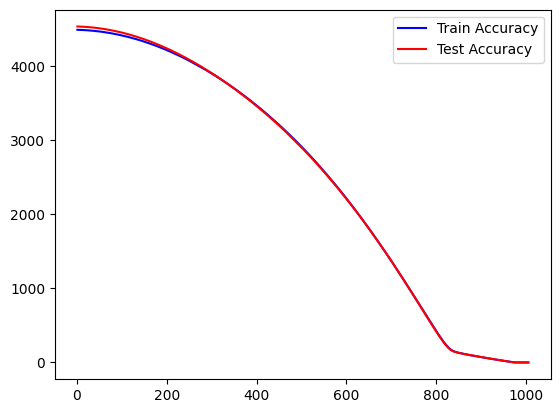

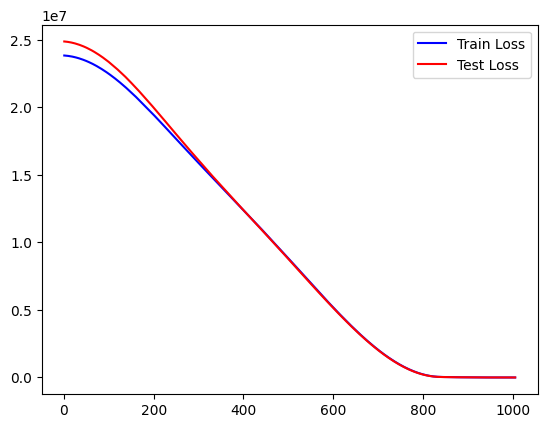

In [77]:
# History of the epochs / iterations
import matplotlib.pyplot as plt

acc = history.history['mae']
val_acc = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure()
plt.plot(epochs, acc, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()

plt.show()

#**Conclusion:**

The initial model was plagued with underfitting issues, which made it perform poorly on both training and validation dataset

<br>To address this, several modifications, including:
1. Changing the activation function from 'relu' to 'linear'.
2. Reducing the number of neurons to 2.
3. Reducing the number of hidden layers to 1.
4. Reducing batch size to 10. 

<br>However, these changes resulted in an overfitting model, which had poor performance on validation sets. To further improve the model, the number of training epochs from the original value had been increased to 1200. This helped the model to learn more complex patterns and achieve better accuracy on both the training and validation dataset. 

<br>After these adjustments, the model is able to achieve the best loss (0.02) and accuracy (0.08). 

<br>In conclusion, the model is now capable of making accurate predictions on new data.